## Configuration

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set_theme()

## Preparation

In [70]:
# Read the data
X = pd.read_csv("train.csv", index_col='Id')
X_test_full = pd.read_csv("test.csv", index_col='Id')

# Remove rows with missing target
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice
X.drop(['SalePrice'], axis=1, inplace=True)

# Validation set
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8,
                                                                test_size=0.2, random_state=0)

# One-het encode
X_train = X_train_full.copy()
X_valid = X_valid_full.copy()
X_test = X_test_full.copy()
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

## Understanding the data

In [71]:
print("train:", X_train.shape)
print("valid:", X_valid.shape)
print("test:", X_test.shape)
X_train.head()

train: (1168, 79)
valid: (292, 79)
test: (1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
619,20,RL,90.0,11694,Pave,NaN,Reg,Lvl,AllPub,Inside,...,260,0,NaN,NaN,NaN,0,7,2007,New,Partial
871,20,RL,60.0,6600,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal
93,30,RL,80.0,13360,Pave,Grvl,IR1,HLS,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal
818,20,RL,NaN,13265,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
303,20,RL,118.0,13704,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,1,2006,WD,Normal


In [72]:
num_col = X_train.select_dtypes(exclude=['object']).copy()
cat_col = X_train.select_dtypes(include=['object']).copy()

cont_num_var = [cname for cname in num_col.columns if num_col[cname].nunique() > 12]
disc_num_var = num_col.drop(cont_num_var, axis=1)

A:\APLIKACJE\Python\venv_datascience\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


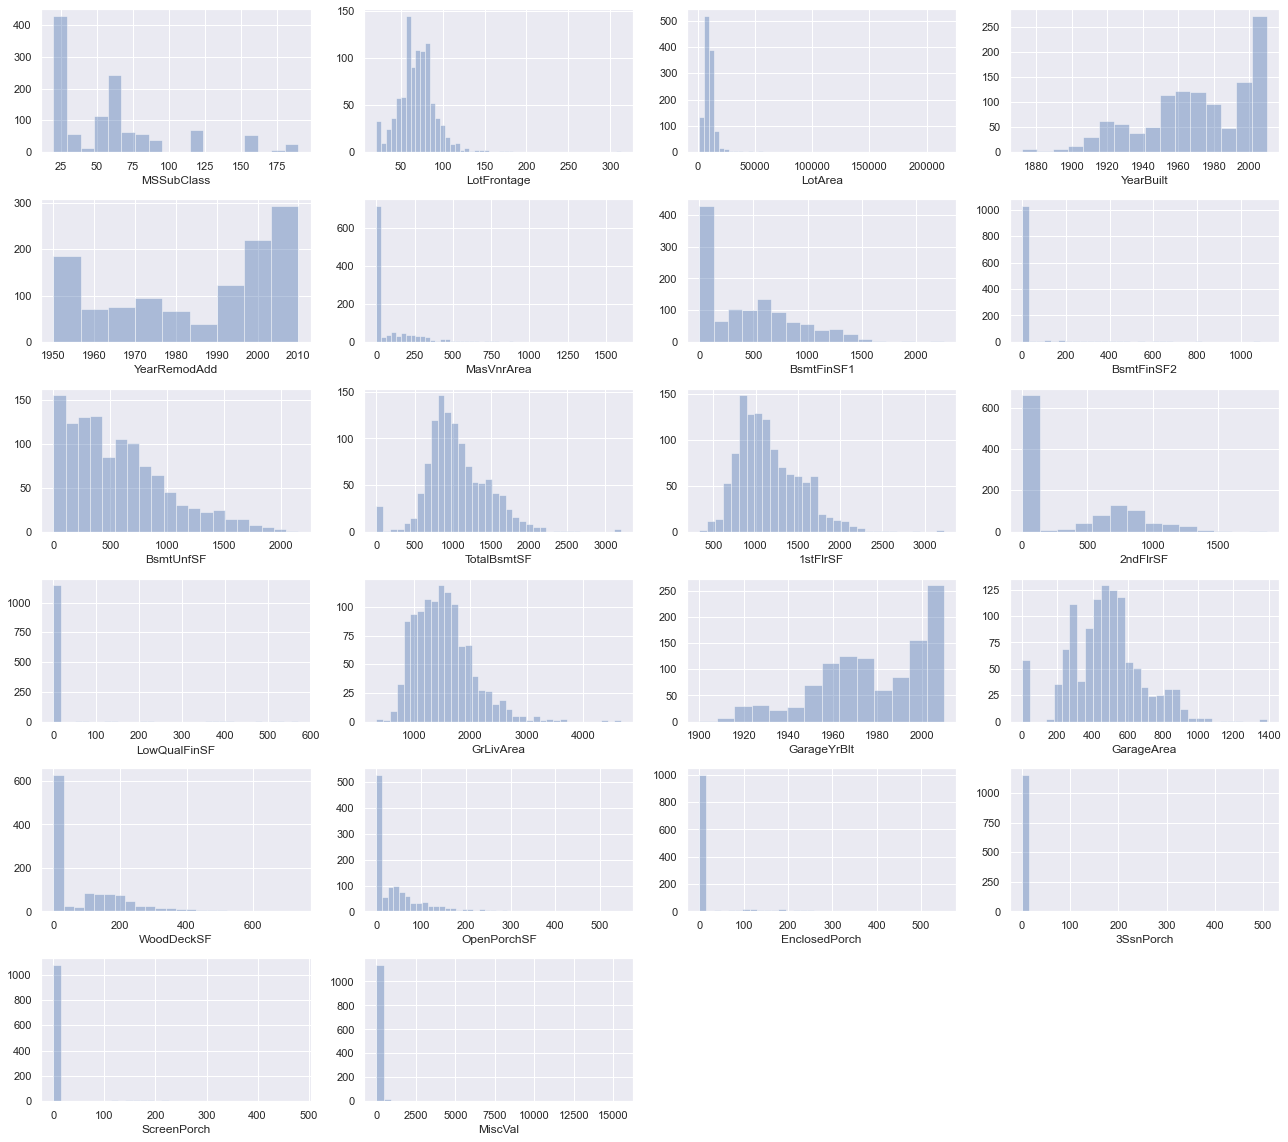

In [81]:
fig = plt.figure(figsize=(18,16))
for index,col in enumerate(cont_num_var):
    plt.subplot(6,4,index+1)
    sns.distplot(num_col.loc[:,col].dropna(), kde=False)
fig.tight_layout(pad=1.0)

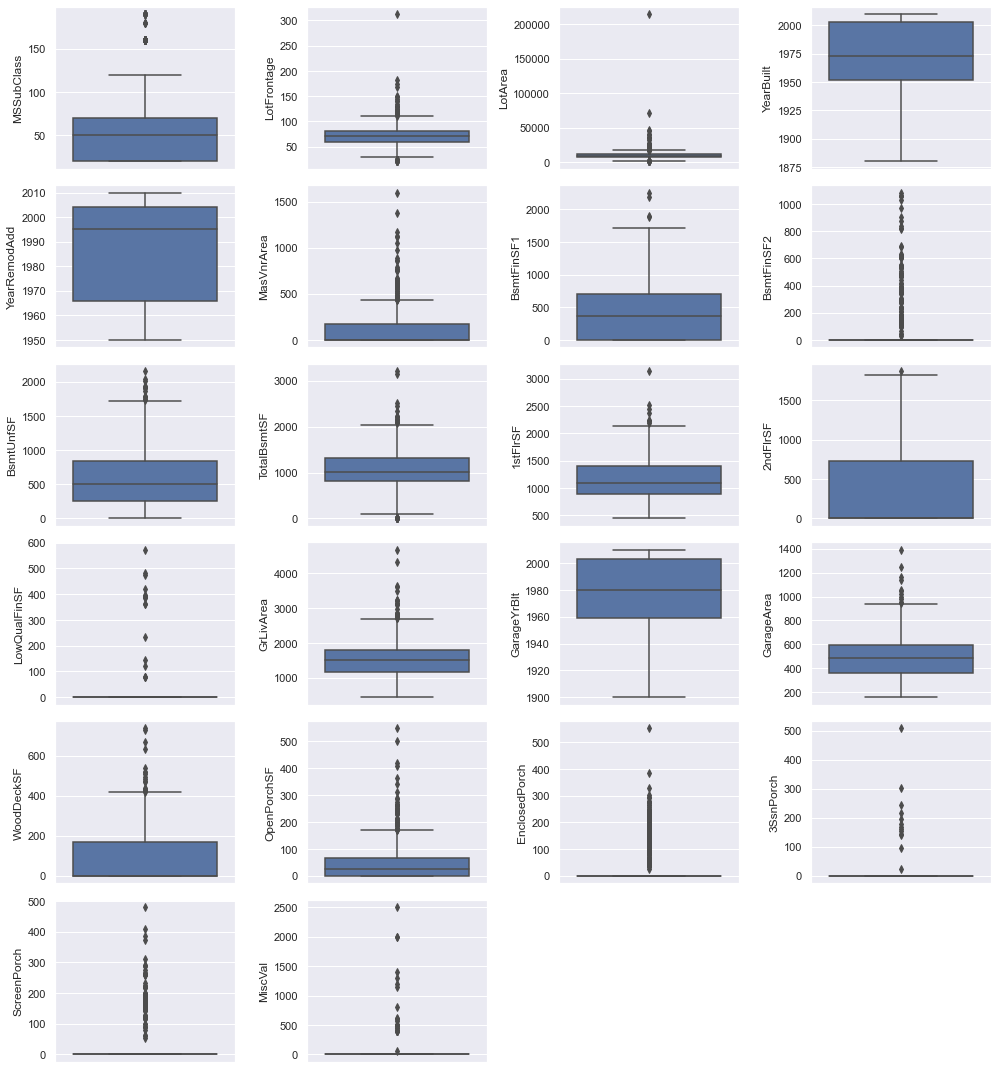

In [83]:
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(cont_num_var):
    plt.subplot(6,4,index+1)
    sns.boxplot(y=col, data=num_col.dropna())
fig.tight_layout(pad=1.0)

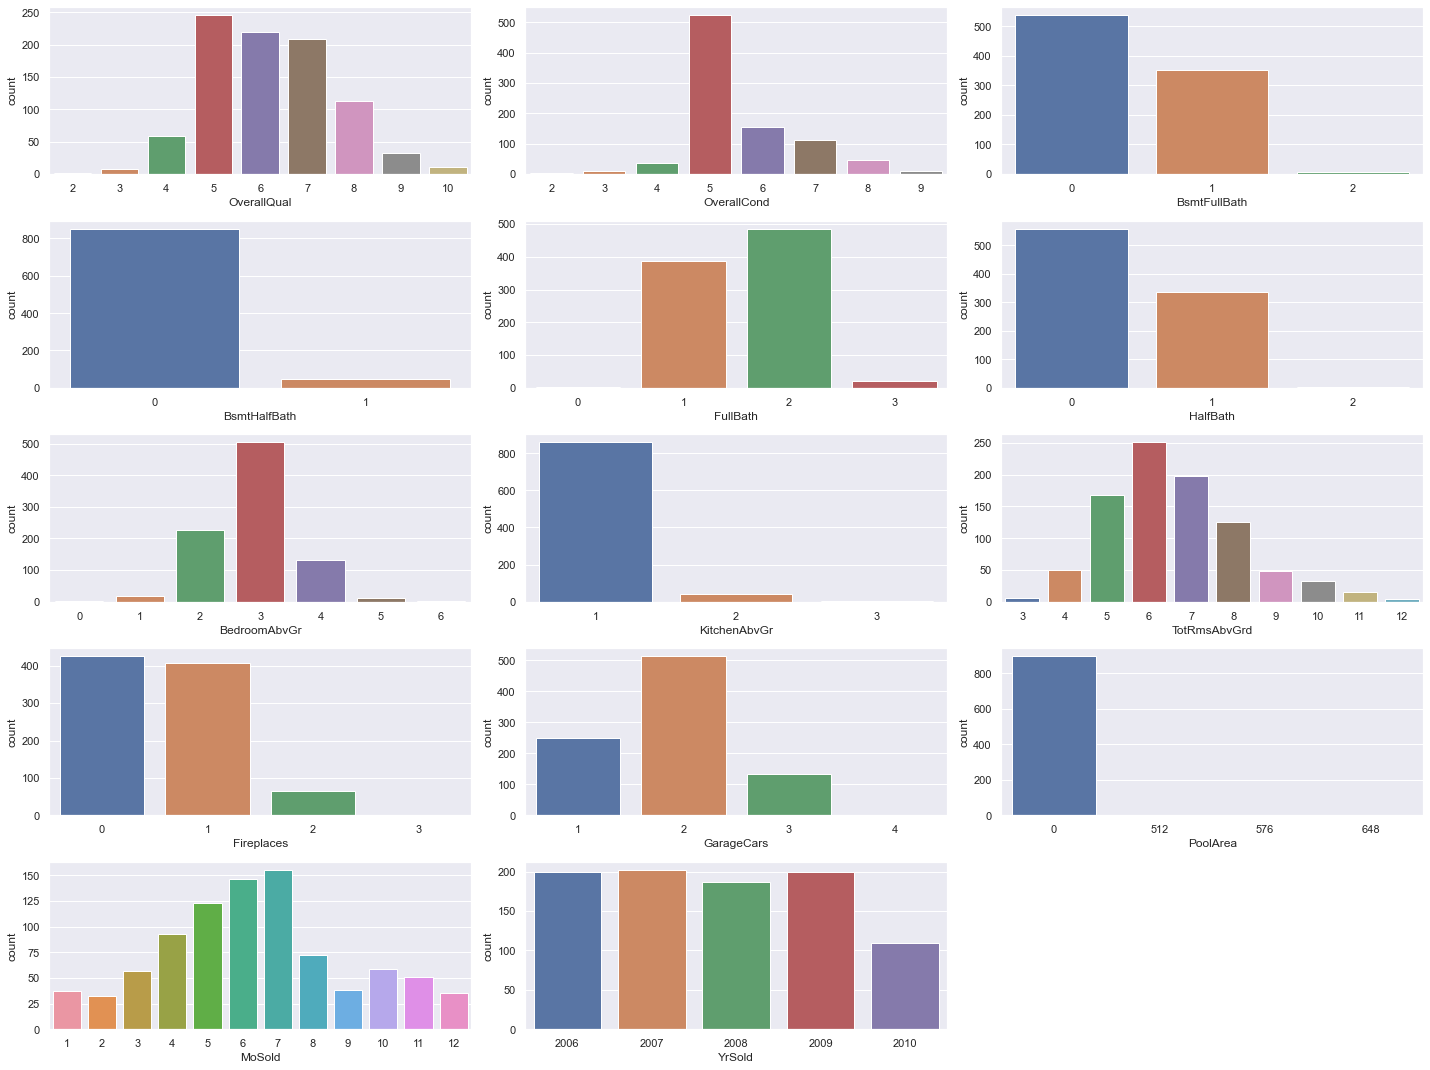

In [84]:
fig = plt.figure(figsize=(20,15))
for index,col in enumerate(disc_num_var):
    plt.subplot(5,3,index+1)
    sns.countplot(x=col, data=num_col.dropna())
fig.tight_layout(pad=1.0)

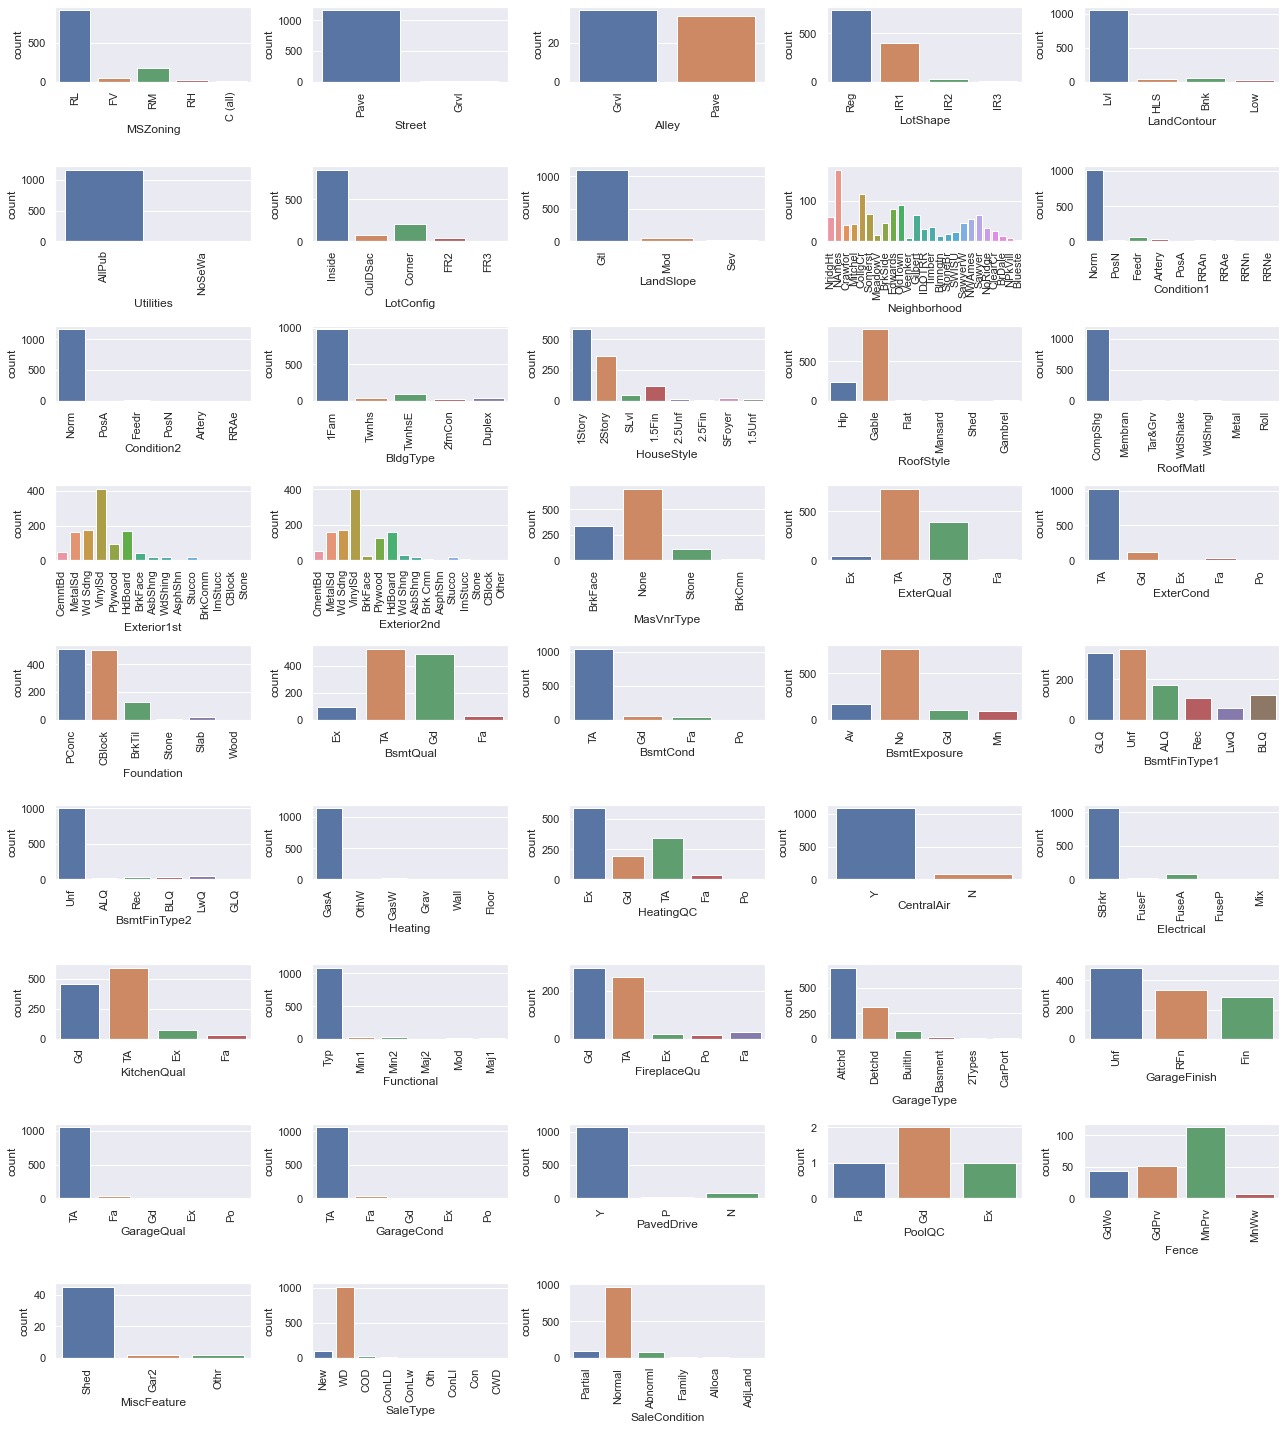

In [85]:
fig = plt.figure(figsize=(18,20))
for index in range(len(cat_col.columns)):
    plt.subplot(9,5,index+1)
    sns.countplot(x=cat_col.iloc[:,index], data=cat_col.dropna())
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

<AxesSubplot:>

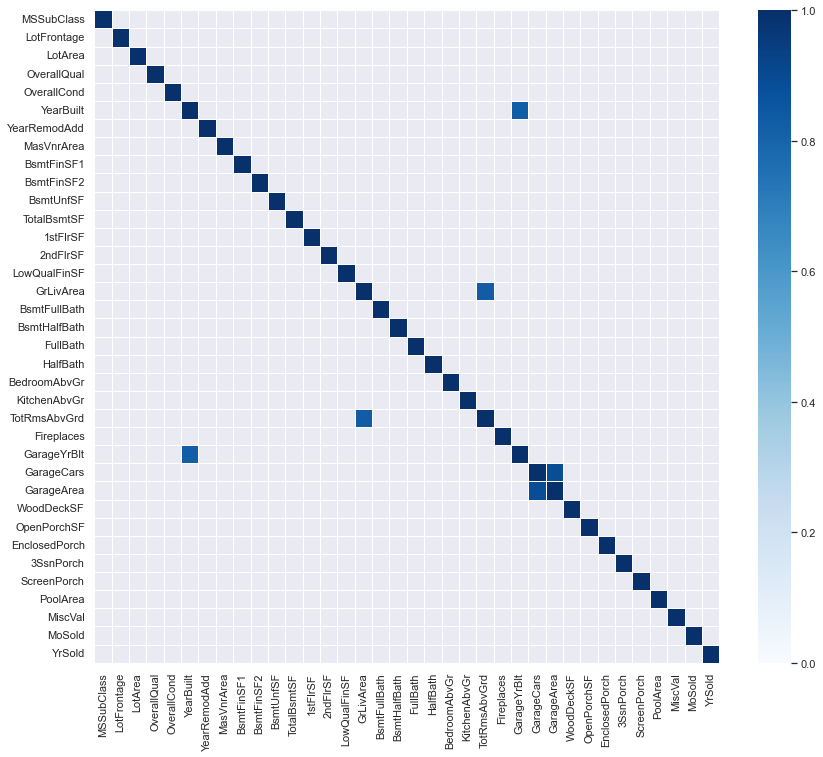

In [86]:
plt.figure(figsize=(14,12))
correlation = num_col.corr()
sns.heatmap(correlation, mask=correlation < 0.8, linewidth=0.5, cmap='Blues', vmin=0)